Data Science Project

In [1]:
print("Hello , Going to start")

Hello , Going to start


Imports 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


#### Data Extraction and processing and Exploration

data extraction

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

#displaying data 
print(data)

      User Id  Sports  Religious  Nature  Theatre  Shopping  Picnic
0      User 1       2         77      79       69        68      95
1      User 2       2         62      76       76        69      68
2      User 3       2         50      97       87        50      75
3      User 4       2         68      77       95        76      61
4      User 5       2         98      54       59        95      86
..        ...     ...        ...     ...      ...       ...     ...
244  User 245      18        139     148      129       129     168
245  User 246      22        114     228      104        84     168
246  User 247      20        124     178      104       158     174
247  User 248      20        133     149      139       144     213
248  User 249      20        143     149      139       159     143

[249 rows x 7 columns]


Shape of data

In [4]:
print(data.shape)

(249, 7)


First 10 rows of data

In [5]:
print(data.head(10))

   User Id  Sports  Religious  Nature  Theatre  Shopping  Picnic
0   User 1       2         77      79       69        68      95
1   User 2       2         62      76       76        69      68
2   User 3       2         50      97       87        50      75
3   User 4       2         68      77       95        76      61
4   User 5       2         98      54       59        95      86
5   User 6       3         52     109       93        52      76
6   User 7       3         64      85       82        73      69
7   User 8       3         54     107       92        54      76
8   User 9       3         64     108       64        54      93
9  User 10       3         86      76       74        74     103


data discription

In [6]:
print(data.describe())

           Sports   Religious      Nature     Theatre    Shopping      Picnic
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000
mean    11.987952  109.779116  124.518072  116.377510  112.638554  120.401606
std      6.616501   32.454115   45.639372   32.132696   41.562888   32.633339
min      2.000000   50.000000   52.000000   59.000000   50.000000   61.000000
25%      6.000000   84.000000   89.000000   93.000000   79.000000   92.000000
50%     12.000000  104.000000  119.000000  113.000000  104.000000  119.000000
75%     18.000000  132.000000  153.000000  138.000000  138.000000  143.000000
max     25.000000  203.000000  318.000000  213.000000  233.000000  218.000000


getting number of missing value and droping data if missing value found

In [7]:
print(data.isnull().sum())

data = data.dropna()


User Id      0
Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     0
Picnic       0
dtype: int64


In [8]:
print(data.shape)

(249, 7)


Discriptive analysis of each column 

In [9]:
desc = data.describe().T
print(desc)

           count        mean        std   min   25%    50%    75%    max
Sports     249.0   11.987952   6.616501   2.0   6.0   12.0   18.0   25.0
Religious  249.0  109.779116  32.454115  50.0  84.0  104.0  132.0  203.0
Nature     249.0  124.518072  45.639372  52.0  89.0  119.0  153.0  318.0
Theatre    249.0  116.377510  32.132696  59.0  93.0  113.0  138.0  213.0
Shopping   249.0  112.638554  41.562888  50.0  79.0  104.0  138.0  233.0
Picnic     249.0  120.401606  32.633339  61.0  92.0  119.0  143.0  218.0


plotting total of each catagory 

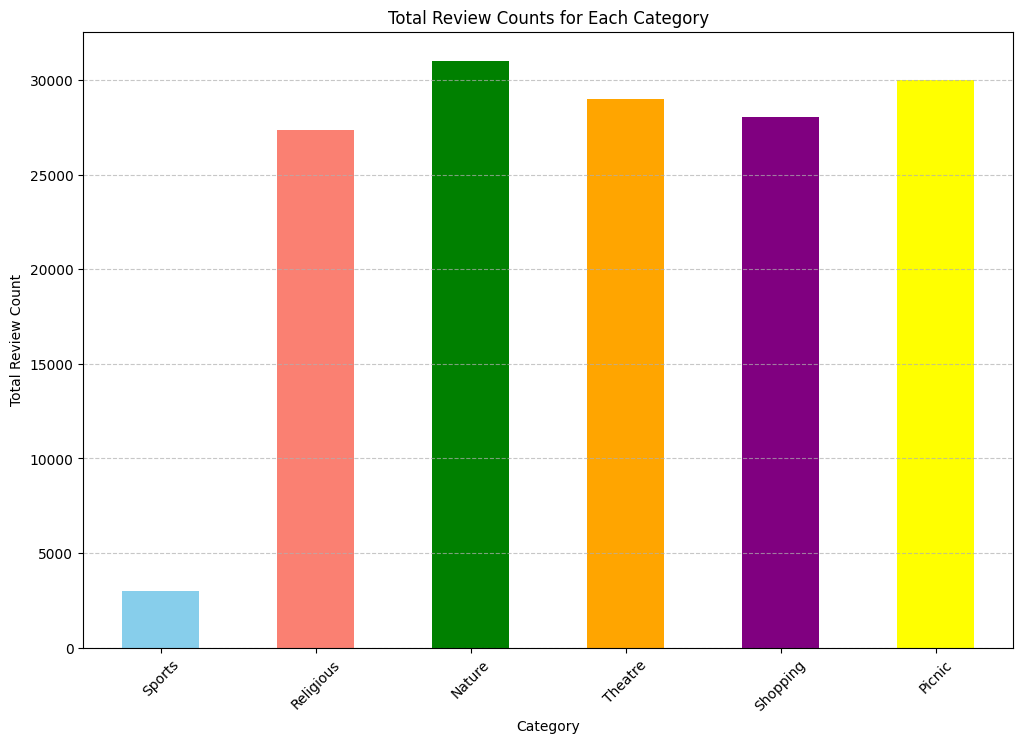

In [10]:
# Calculate the total count for each category
total_counts = data.iloc[:, 1:].sum()

# Define colors for each category
colors = ['skyblue', 'salmon', 'green', 'orange', 'purple', 'yellow']

# Plot the total counts
plt.figure(figsize=(12, 8))
total_counts.plot(kind='bar', color=colors)
plt.title('Total Review Counts for Each Category')
plt.xlabel('Category')
plt.ylabel('Total Review Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Plotting midean for closup view

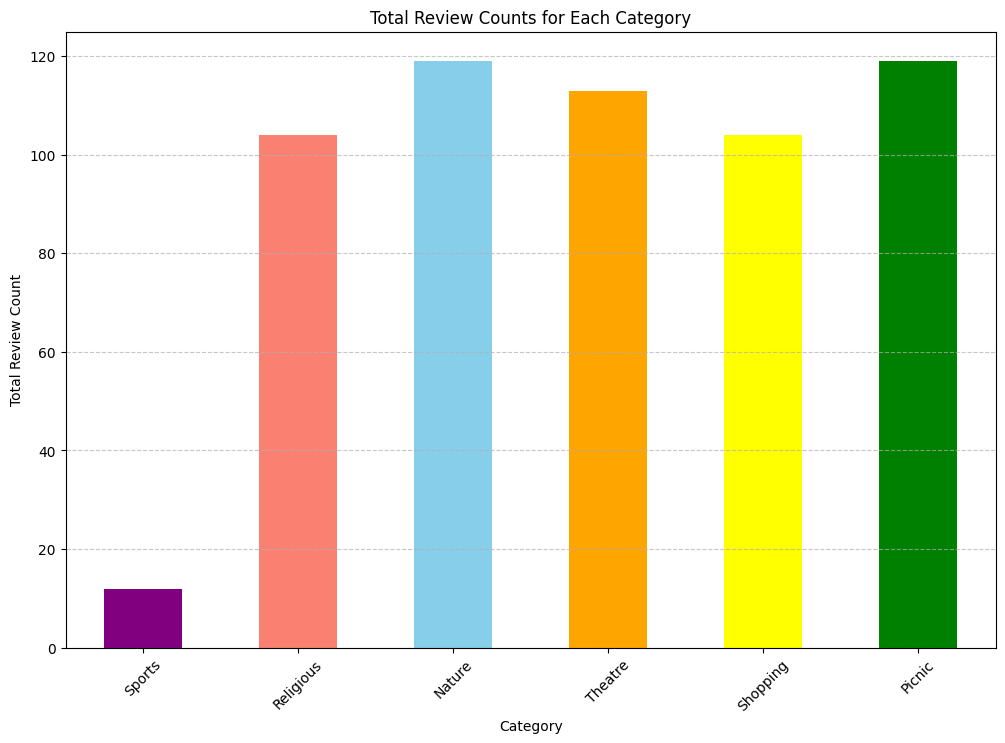

In [11]:
# Calculate the total count for each category
total_counts = data.iloc[:, 1:].median()

# Define colors for each category
colors = ['skyblue', 'salmon', 'green', 'orange', 'purple', 'yellow']
random.shuffle(colors)
# Plot the total counts
plt.figure(figsize=(12, 8))
total_counts.plot(kind='bar', color=colors)
plt.title('Total Review Counts for Each Category')
plt.xlabel('Category')
plt.ylabel('Total Review Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Distribution of count of review in each catagory 

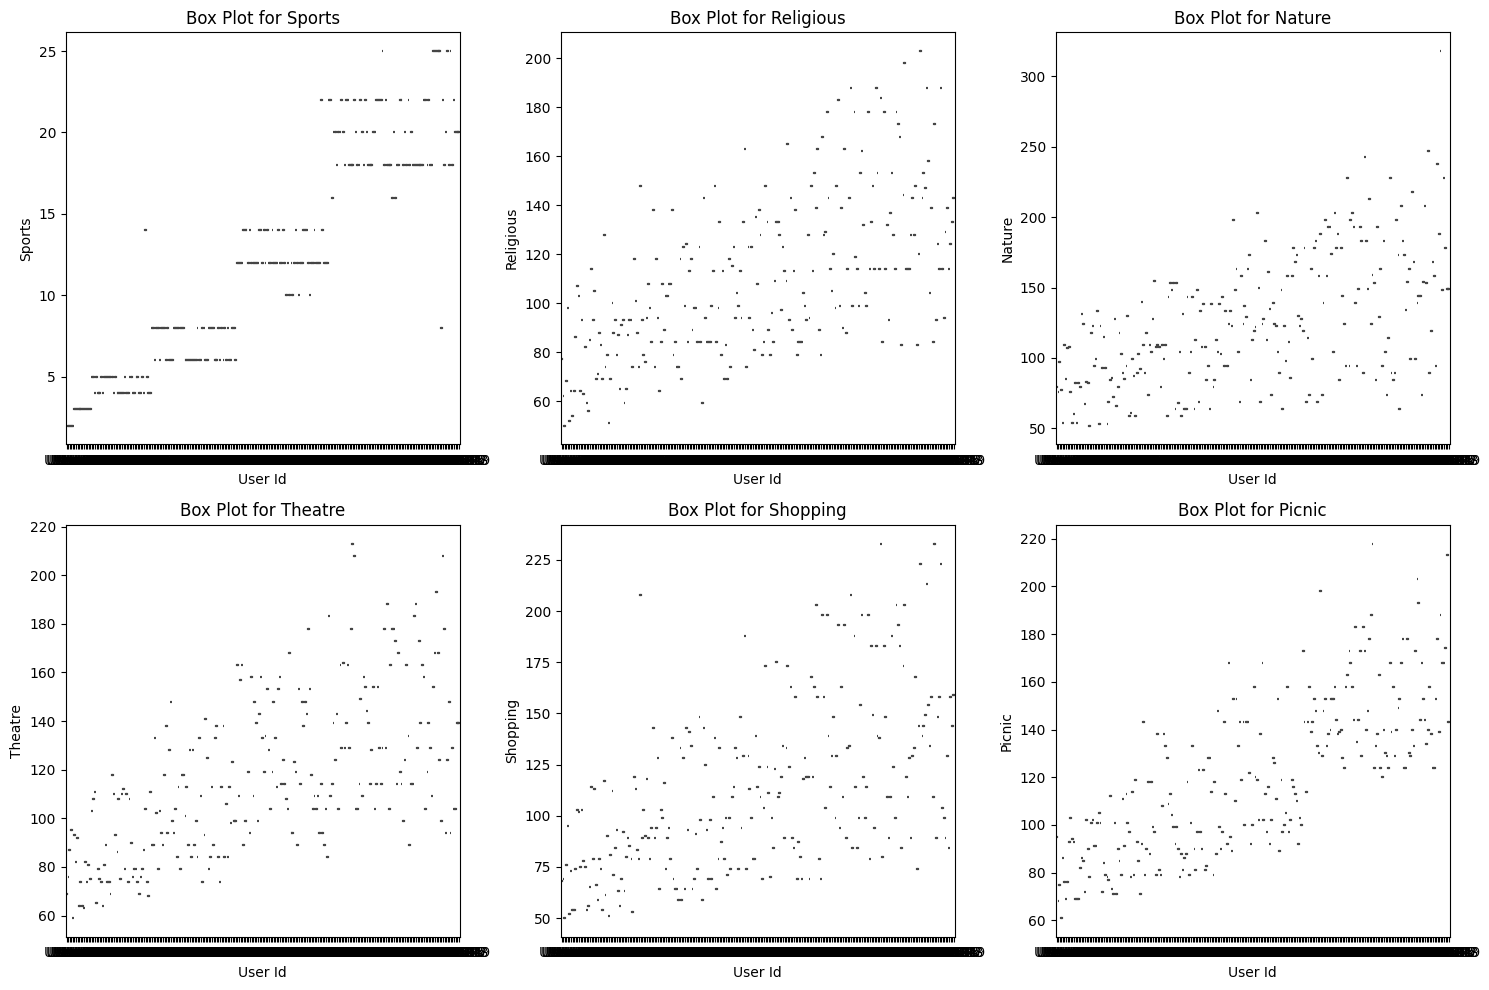

In [12]:
category_column = 'User Id'

# Define the numerical variable columns
numerical_columns = ['Sports', 'Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic']

# Create subplots for each numerical variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over numerical columns and create box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=category_column, y=column, data=data, ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel('User Id')
    axes[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

Plotting histograms to visualize the distributions of review counts across different categories

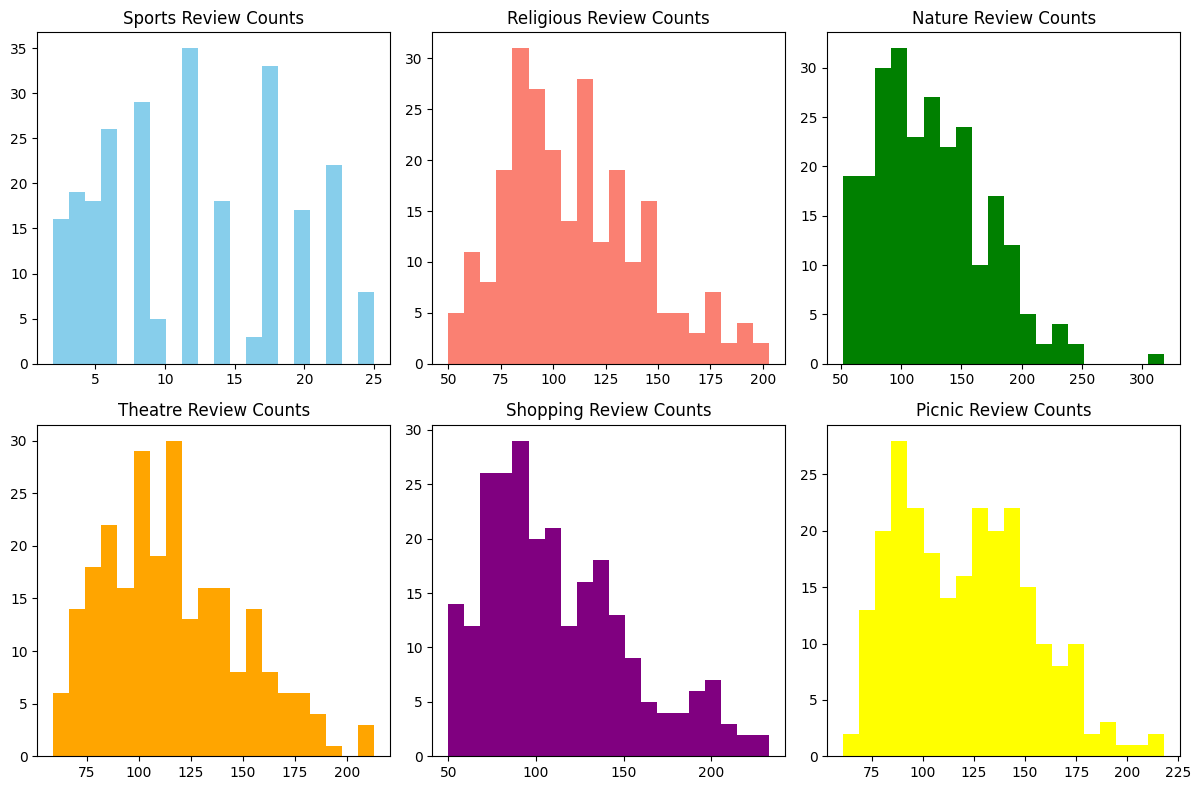

In [13]:
# Histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(data['Sports'], bins=20, color='skyblue')
plt.title('Sports Review Counts')

plt.subplot(2, 3, 2)
plt.hist(data['Religious'], bins=20, color='salmon')
plt.title('Religious Review Counts')

plt.subplot(2, 3, 3)
plt.hist(data['Nature'], bins=20, color='green')
plt.title('Nature Review Counts')

plt.subplot(2, 3, 4)
plt.hist(data['Theatre'], bins=20, color='orange')
plt.title('Theatre Review Counts')

plt.subplot(2, 3, 5)
plt.hist(data['Shopping'], bins=20, color='purple')
plt.title('Shopping Review Counts')

plt.subplot(2, 3, 6)
plt.hist(data['Picnic'], bins=20, color='yellow')
plt.title('Picnic Review Counts')

plt.tight_layout()
plt.show()


##### Box plot
it is providing Visualizaion of distribution of data, including median, quartiles, and outliers, across different categories.

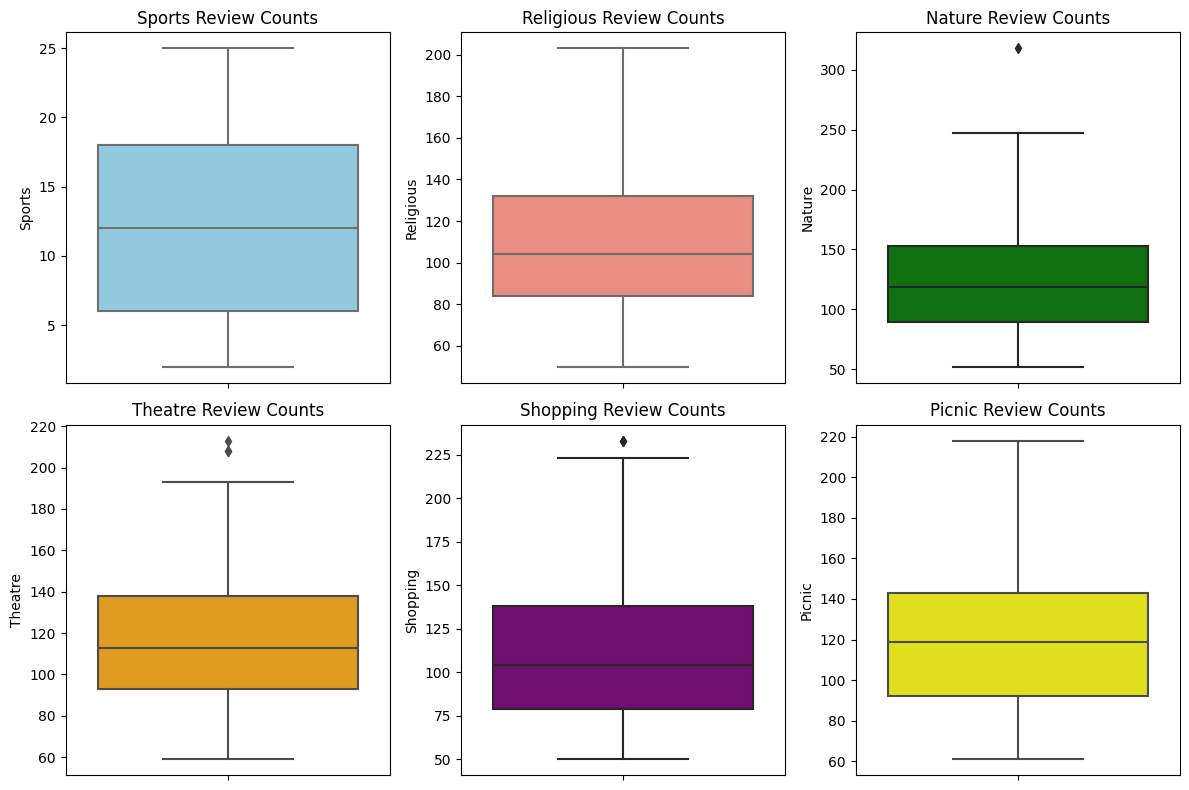

In [14]:
# Box plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(y='Sports', data=data, color='skyblue')
plt.title('Sports Review Counts')

plt.subplot(2, 3, 2)
sns.boxplot(y='Religious', data=data, color='salmon')
plt.title('Religious Review Counts')

plt.subplot(2, 3, 3)
sns.boxplot(y='Nature', data=data, color='green')
plt.title('Nature Review Counts')

plt.subplot(2, 3, 4)
sns.boxplot(y='Theatre', data=data, color='orange')
plt.title('Theatre Review Counts')

plt.subplot(2, 3, 5)
sns.boxplot(y='Shopping', data=data, color='purple')
plt.title('Shopping Review Counts')

plt.subplot(2, 3, 6)
sns.boxplot(y='Picnic', data=data, color='yellow')
plt.title('Picnic Review Counts')

plt.tight_layout()
plt.show()


Swarm plots  providing a clearer representation of the distribution of data points

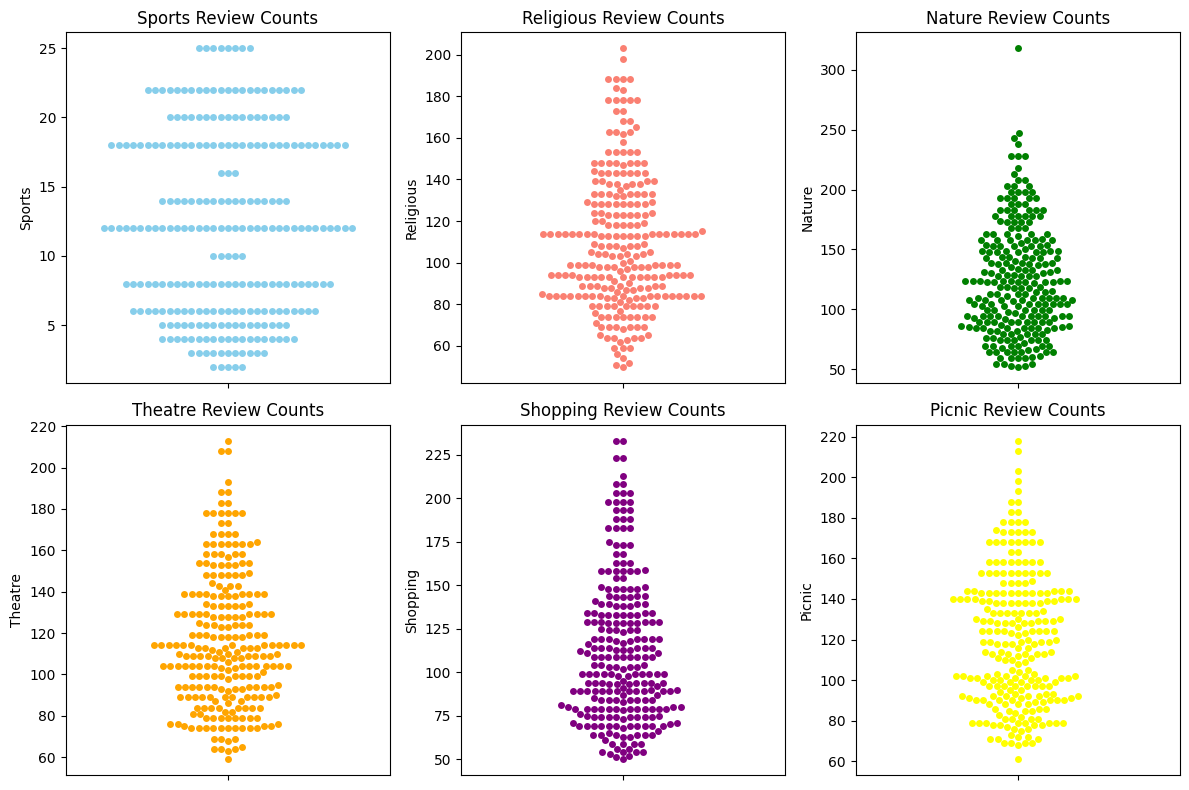

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.swarmplot(y='Sports', data=data, color='skyblue')
plt.title('Sports Review Counts')

plt.subplot(2, 3, 2)
sns.swarmplot(y='Religious', data=data, color='salmon')
plt.title('Religious Review Counts')

plt.subplot(2, 3, 3)
sns.swarmplot(y='Nature', data=data, color='green')
plt.title('Nature Review Counts')

plt.subplot(2, 3, 4)
sns.swarmplot(y='Theatre', data=data, color='orange')
plt.title('Theatre Review Counts')

plt.subplot(2, 3, 5)
sns.swarmplot(y='Shopping', data=data, color='purple')
plt.title('Shopping Review Counts')

plt.subplot(2, 3, 6)
sns.swarmplot(y='Picnic', data=data, color='yellow')
plt.title('Picnic Review Counts')

plt.tight_layout()
plt.show()

Violine plot

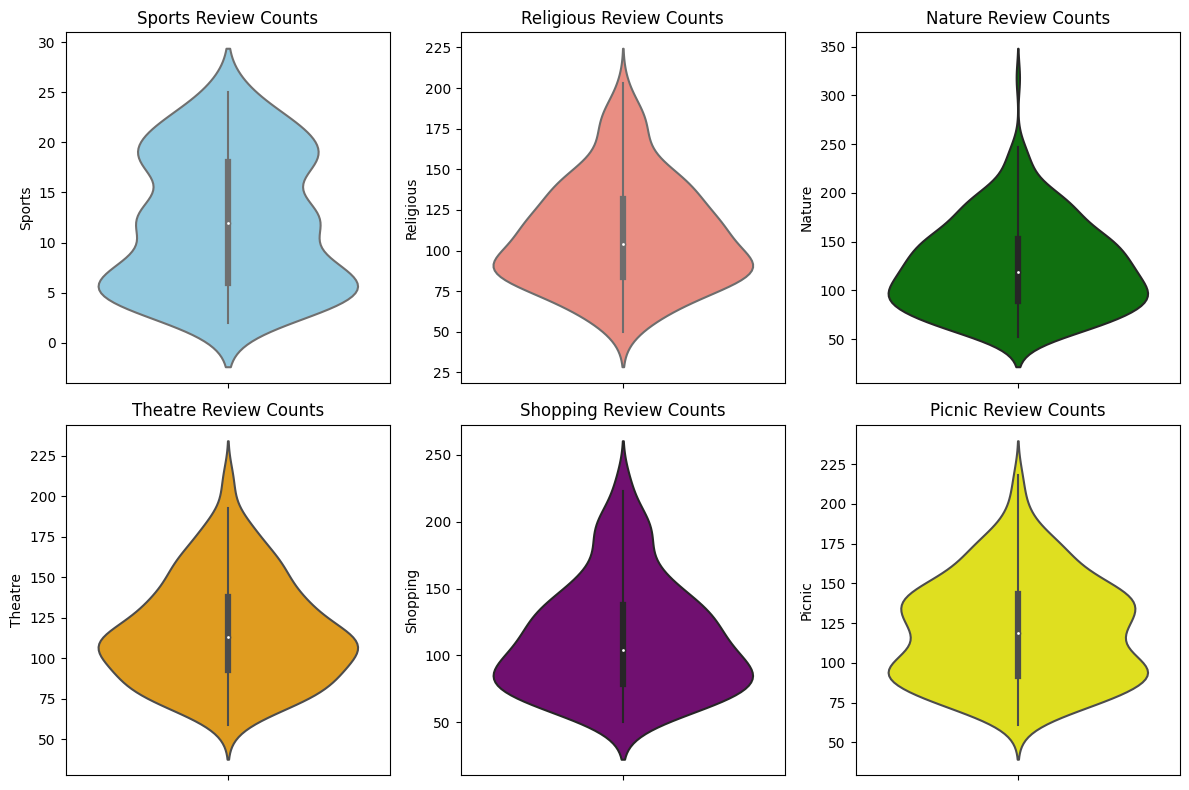

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.violinplot(y='Sports', data=data, color='skyblue')
plt.title('Sports Review Counts')

plt.subplot(2, 3, 2)
sns.violinplot(y='Religious', data=data, color='salmon')
plt.title('Religious Review Counts')

plt.subplot(2, 3, 3)
sns.violinplot(y='Nature', data=data, color='green')
plt.title('Nature Review Counts')

plt.subplot(2, 3, 4)
sns.violinplot(y='Theatre', data=data, color='orange')
plt.title('Theatre Review Counts')

plt.subplot(2, 3, 5)
sns.violinplot(y='Shopping', data=data, color='purple')
plt.title('Shopping Review Counts')

plt.subplot(2, 3, 6)
sns.violinplot(y='Picnic', data=data, color='yellow')
plt.title('Picnic Review Counts')

plt.tight_layout()
plt.show()

pairplot to visualize relationships between different categories

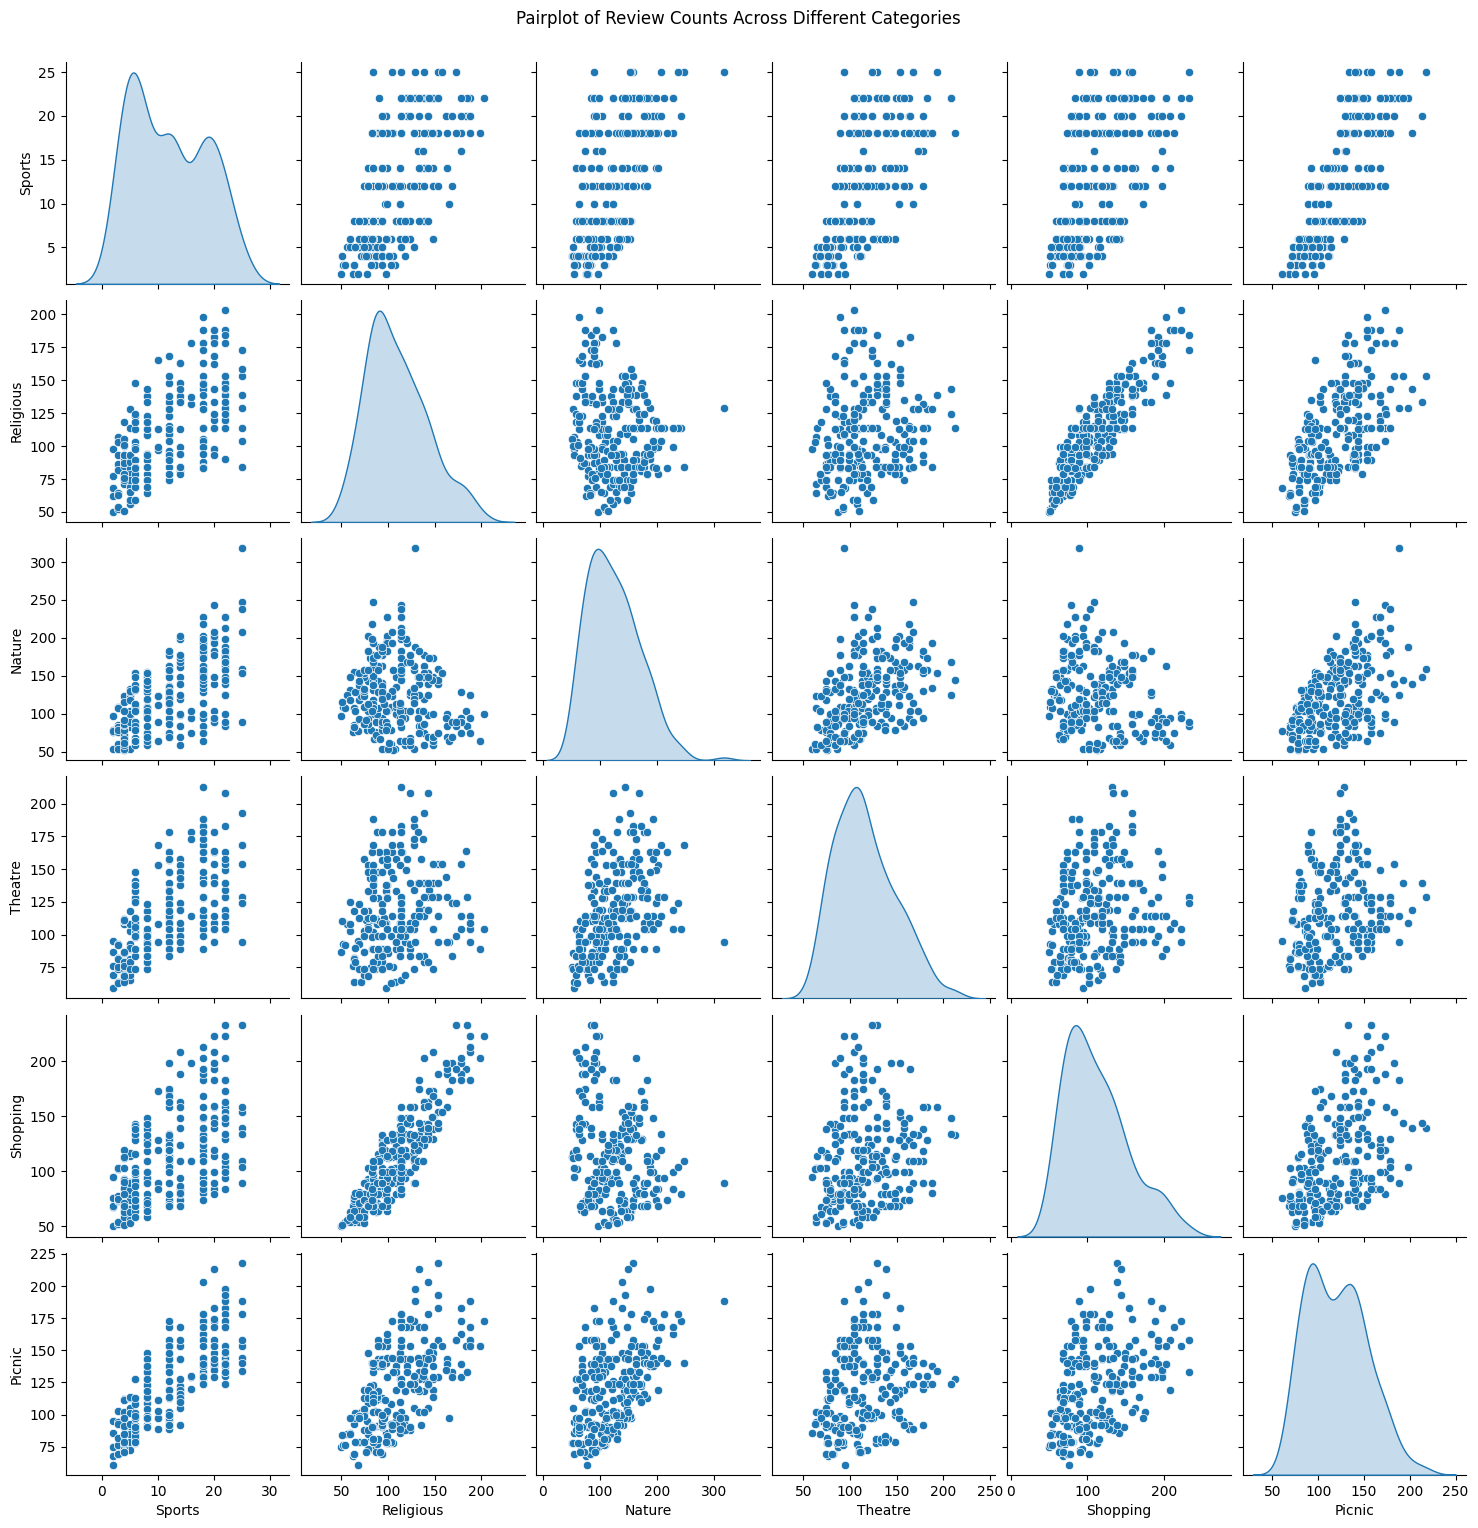

In [17]:
# Pairplot
sns.pairplot(data=data.iloc[:, 1:], diag_kind='kde')
plt.suptitle('Pairplot of Review Counts Across Different Categories', y=1.02)
plt.show()


pair plot with hue

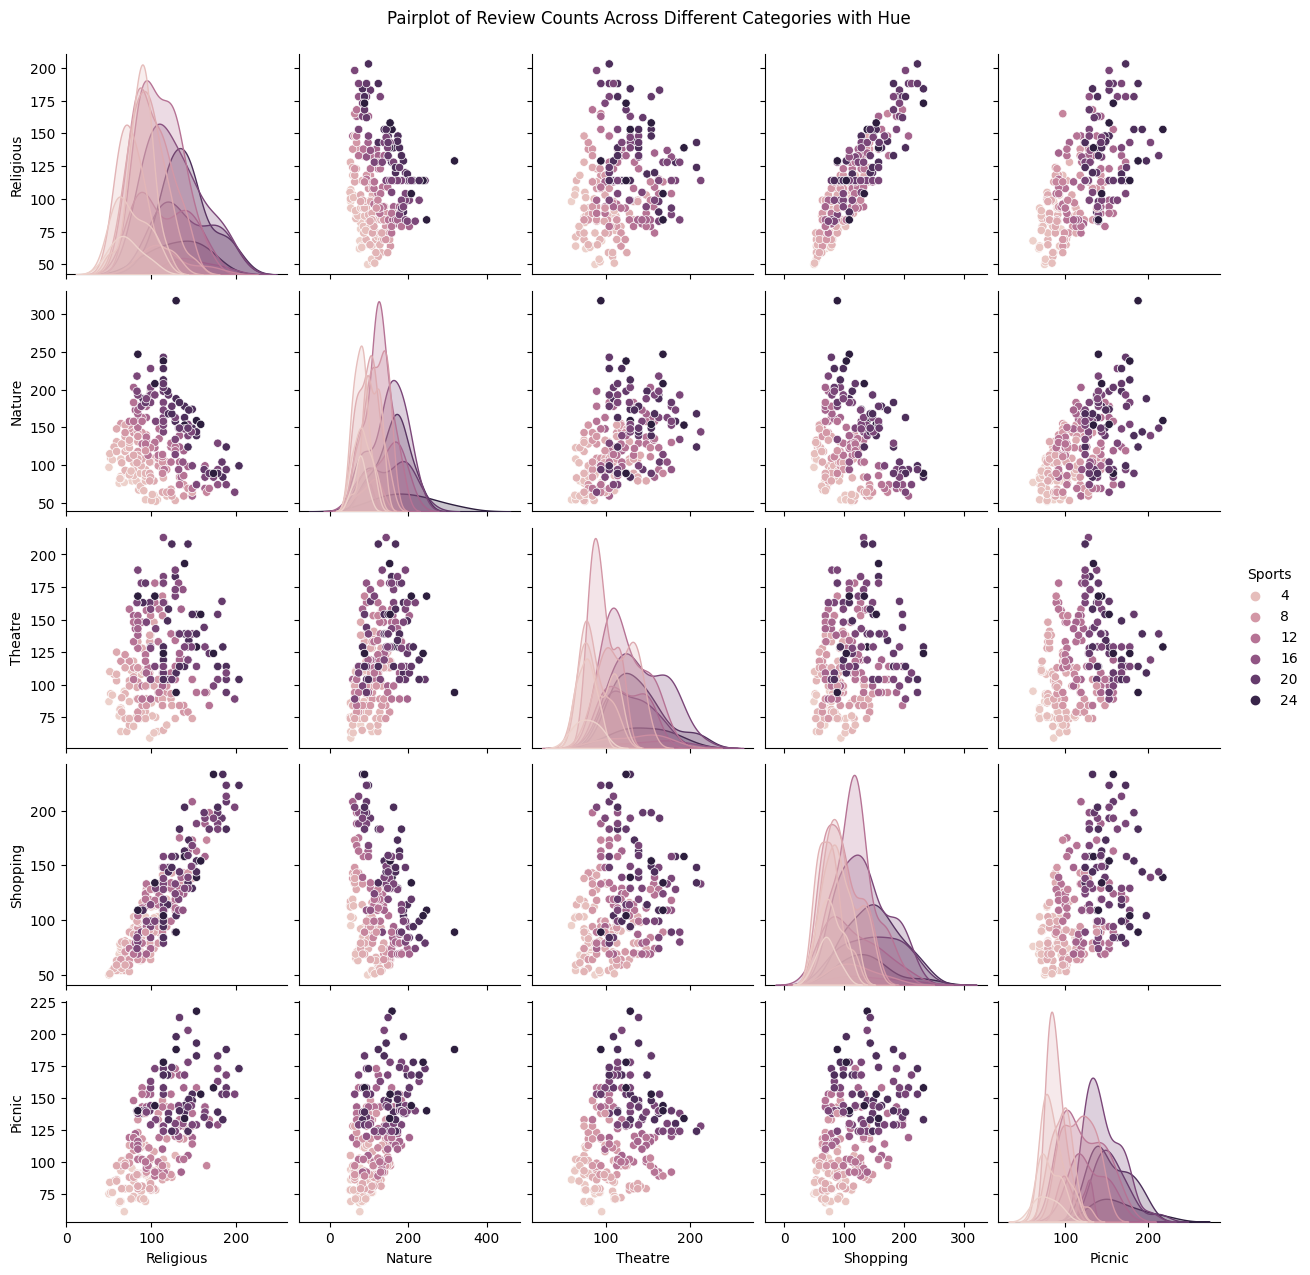

<Figure size 1200x1000 with 0 Axes>

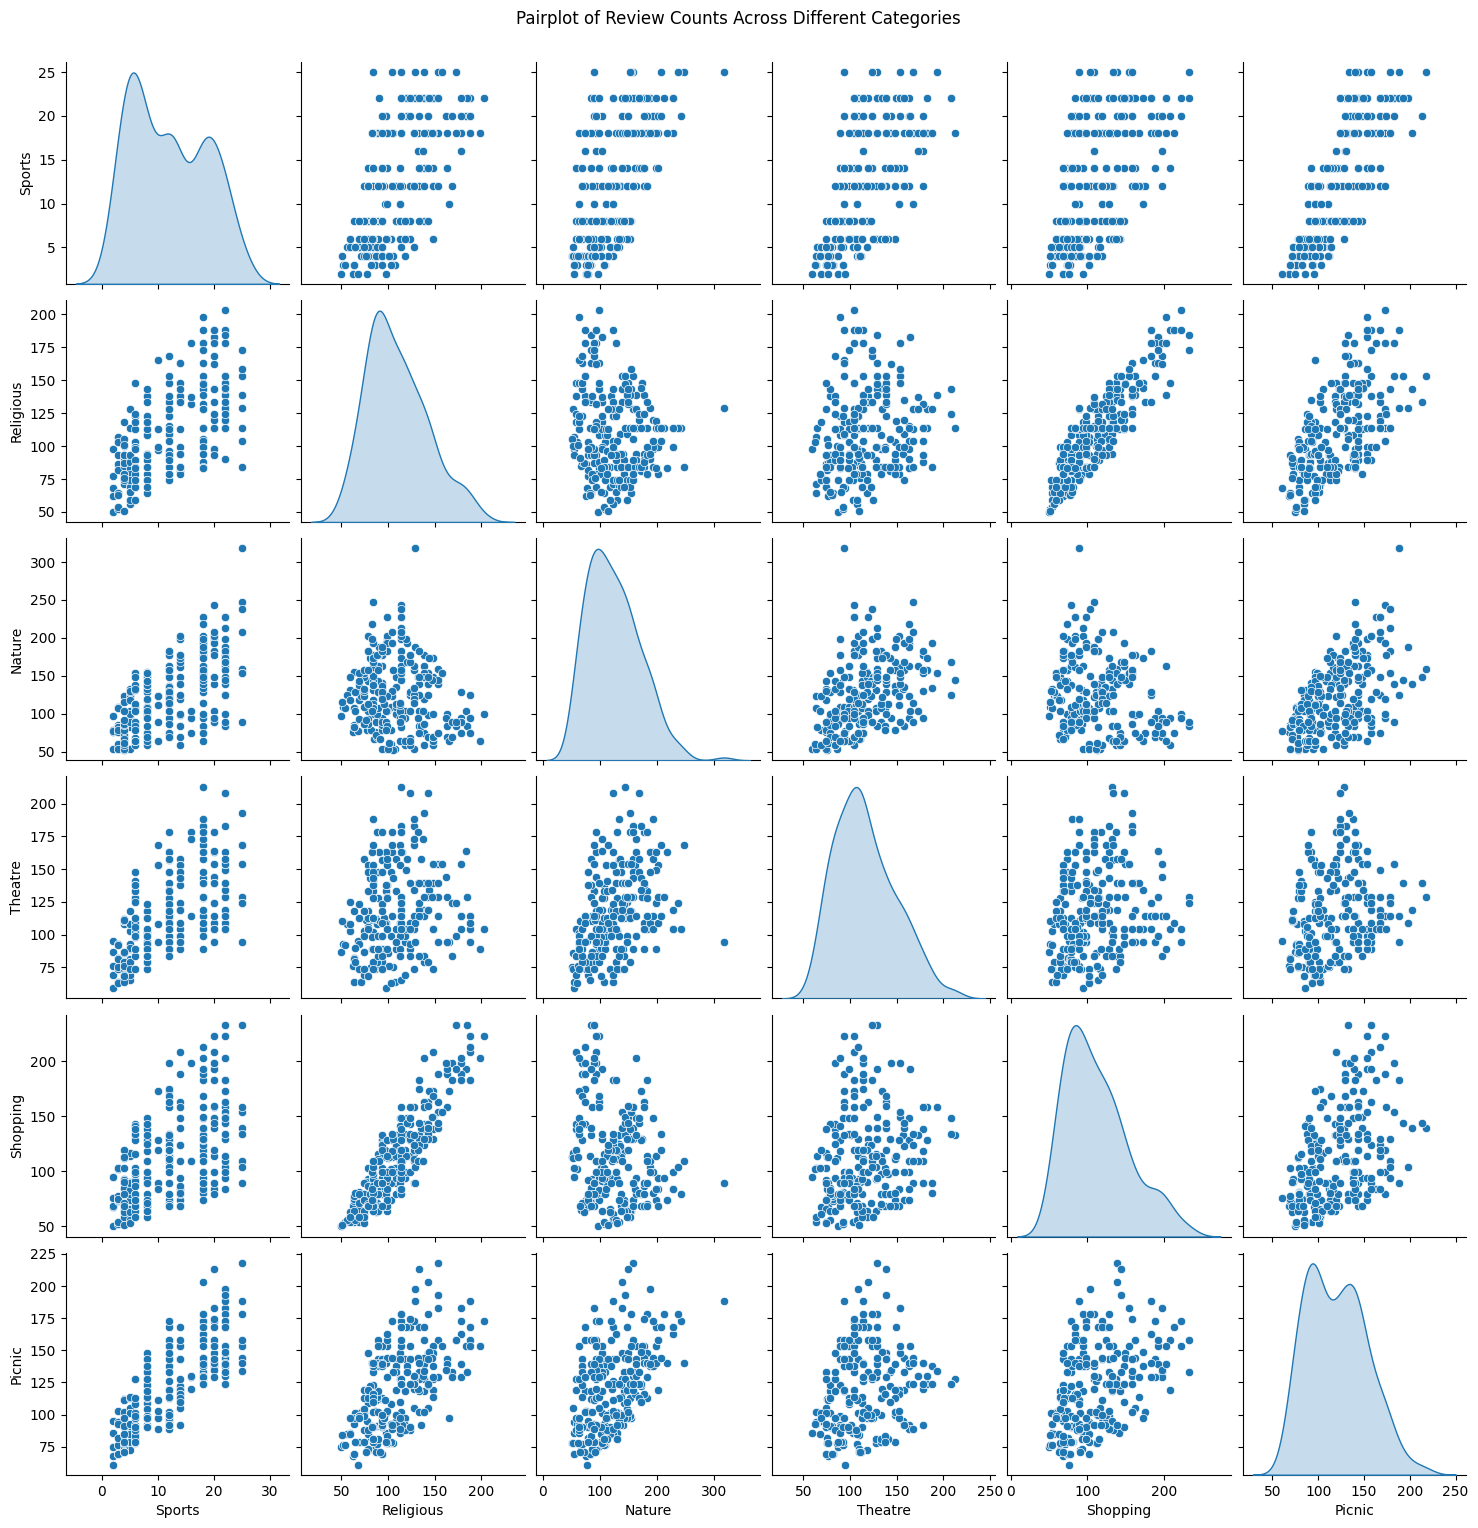

In [18]:
sns.pairplot(data=data.iloc[:, 1:], hue='Sports', diag_kind='kde')
plt.suptitle('Pairplot of Review Counts Across Different Categories with Hue', y=1.02)
plt.show()


plt.figure(figsize=(12, 10))
sns.pairplot(data=data.iloc[:, 1:], diag_kind='kde')
plt.suptitle('Pairplot of Review Counts Across Different Categories', y=1.02)
plt.show()

getting corrilation matrix


In [19]:
Correletion_matrix = data.iloc[:, 1:].corr()
print(Correletion_matrix)

             Sports  Religious    Nature   Theatre  Shopping    Picnic
Sports     1.000000   0.623400  0.608372  0.611728  0.583956  0.797777
Religious  0.623400   1.000000 -0.148365  0.169960  0.895652  0.603240
Nature     0.608372  -0.148365  1.000000  0.426901 -0.186125  0.522005
Theatre    0.611728   0.169960  0.426901  1.000000  0.182606  0.225921
Shopping   0.583956   0.895652 -0.186125  0.182606  1.000000  0.442214
Picnic     0.797777   0.603240  0.522005  0.225921  0.442214  1.000000


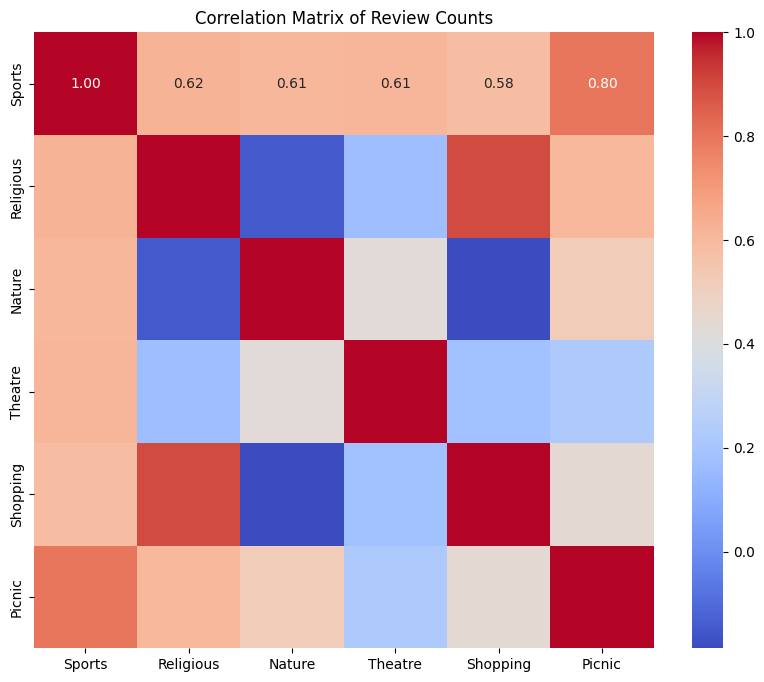

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(Correletion_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Review Counts')
plt.show()



Density plot of each 

C:\Users\msriz\AppData\Local\Temp\ipykernel_20724\1590180587.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
C:\Users\msriz\AppData\Local\Temp\ipykernel_20724\1590180587.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
C:\Users\msriz\AppData\Local\Temp\ipykernel_20724\1590180587.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
C:\Users\msriz\AppData\Local\Temp\ipykernel_20724\1590180587.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become a

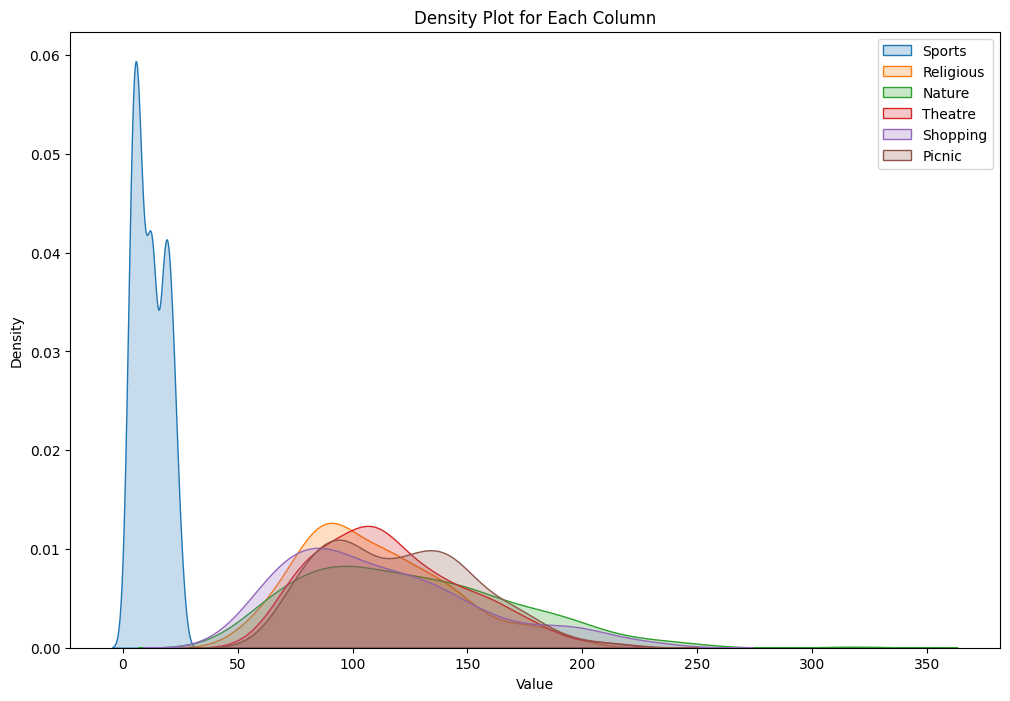

In [21]:
subset_data = data.iloc[:, 1:]

# Create density plot for each column
plt.figure(figsize=(12, 8))
for column in subset_data.columns:
    sns.kdeplot(data[column], shade=True, label=column)

plt.title('Density Plot for Each Column')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

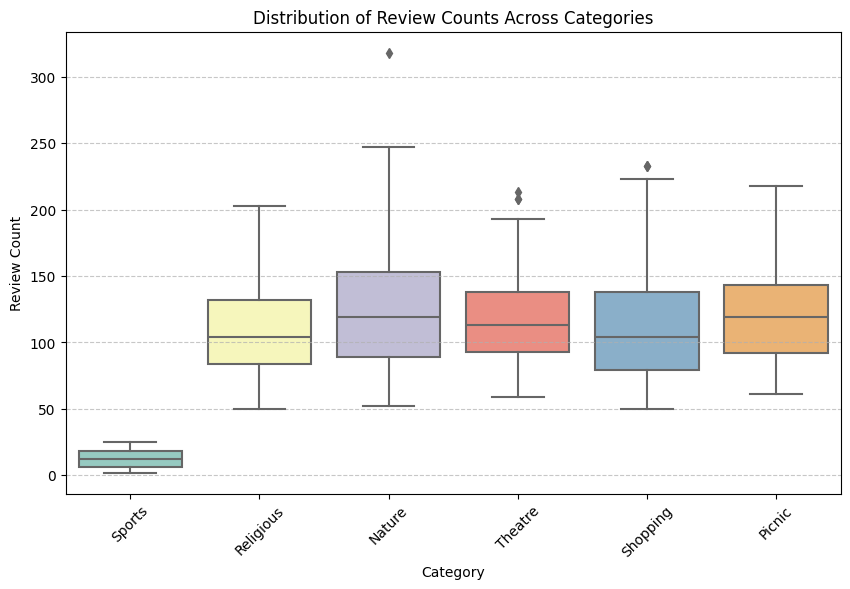

In [22]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, 1:], palette='Set3')
plt.title('Distribution of Review Counts Across Categories')
plt.xlabel('Category')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Data Modeling 

as our data is not labeled so we will use clustering algorithm like k-mean, hirerchial clustering, DBscan

Elbow Method: for calculating optimal value of k

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

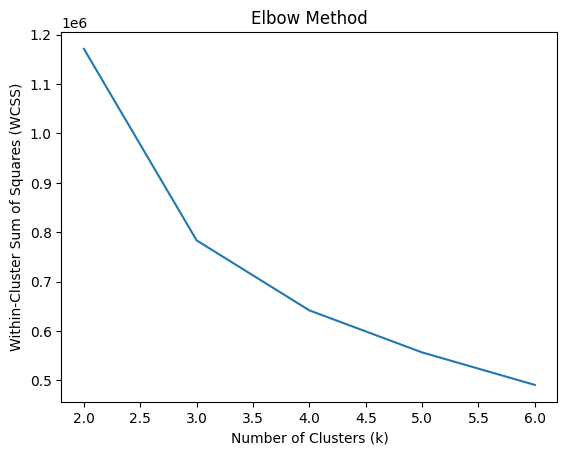

In [23]:


wcss = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


Silhouette Score: finding highest silhoutte score for optimal k

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

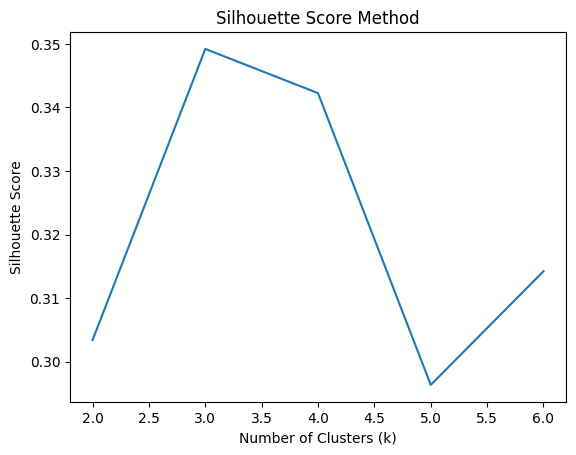

In [24]:


silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data.iloc[:, 1:])
    silhouette_scores.append(silhouette_score(data.iloc[:, 1:], kmeans.labels_))

plt.plot(range(2, 7), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


K-mean clustering 

In [25]:


# Specify the number of clusters (K)
k = 3  # You can choose an appropriate value based on domain knowledge or using techniques like elbow method or silhouette score

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(data.iloc[:, 1:])  # Exclude the User Id column

# Get cluster labels for each data point
cluster_labels = kmeans.labels_
# print(cluster_labels)


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
# Add cluster labels to the dataset
data['Cluster'] = cluster_labels
print(data)

# Analyze the characteristics of each cluster
cluster_summary = data.iloc[:, 1:].groupby('Cluster').mean()
print(cluster_summary)


      User Id  Sports  Religious  Nature  Theatre  Shopping  Picnic  Cluster
0      User 1       2         77      79       69        68      95        2
1      User 2       2         62      76       76        69      68        2
2      User 3       2         50      97       87        50      75        2
3      User 4       2         68      77       95        76      61        2
4      User 5       2         98      54       59        95      86        2
..        ...     ...        ...     ...      ...       ...     ...      ...
244  User 245      18        139     148      129       129     168        0
245  User 246      22        114     228      104        84     168        0
246  User 247      20        124     178      104       158     174        0
247  User 248      20        133     149      139       144     213        0
248  User 249      20        143     149      139       159     143        0

[249 rows x 8 columns]
            Sports   Religious      Nature     Theat

Cluster 0 has relatively high values for Nature and Picnic compared to other clusters, indicating that it might be influenced more by these two categories.
Cluster 1 has relatively low values for all categories compared to other clusters.
Cluster 2 has a very high value for Shopping, suggesting that it might be strongly influenced by this category.
Cluster 3 has relatively high values for Religious and Theatre.

<Figure size 1000x600 with 0 Axes>

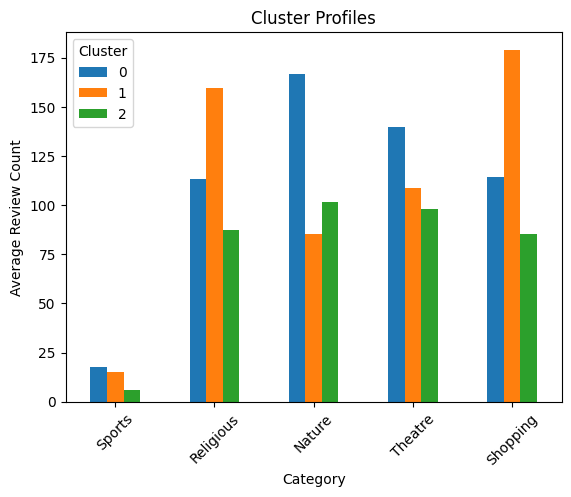

In [27]:
plt.figure(figsize=(10, 6))
cluster_summary.iloc[:, :-1].T.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Average Review Count')
plt.title('Cluster Profiles')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

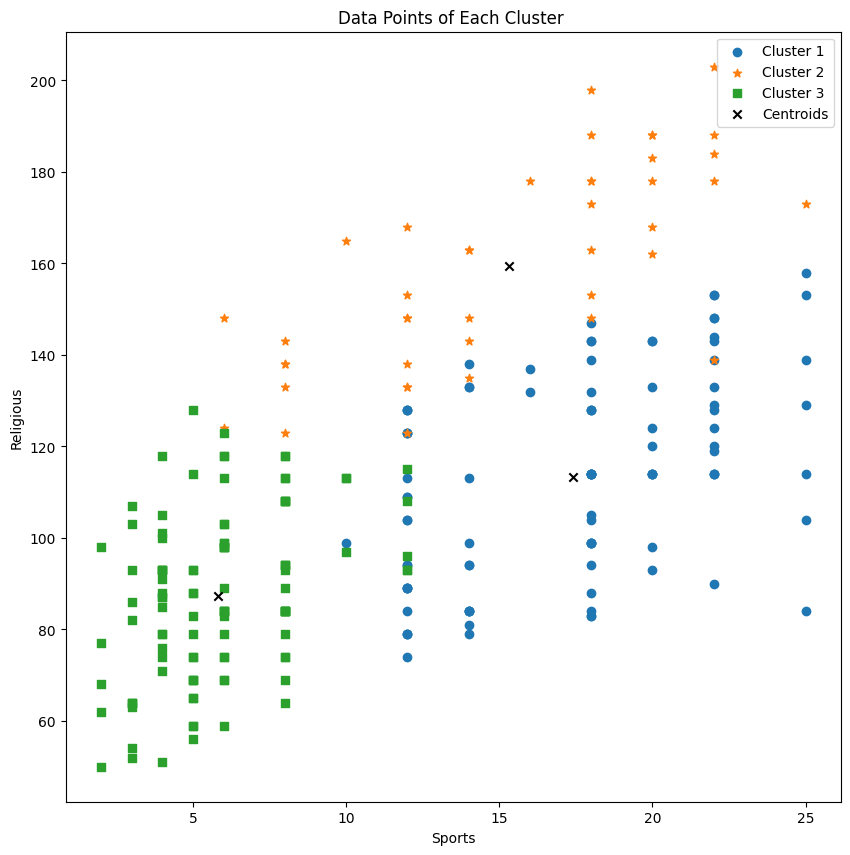

In [28]:


# Specify marker styles for each cluster
marker_styles = ['o', '*', 's', 'D', '^', 'v']

plt.figure(figsize=(10, 10))
# Plot the points of each cluster
for i in range(k):
    cluster_points = data[data['Cluster'] == i].iloc[:, 1:]  # Extract points of the current cluster
    plt.scatter(cluster_points['Sports'], cluster_points['Religious'], label=f'Cluster {i+1}', marker=marker_styles[i])

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', label='Centroids')

plt.xlabel('Sports')
plt.ylabel('Religious')
plt.title('Data Points of Each Cluster ')
plt.legend()
plt.show()


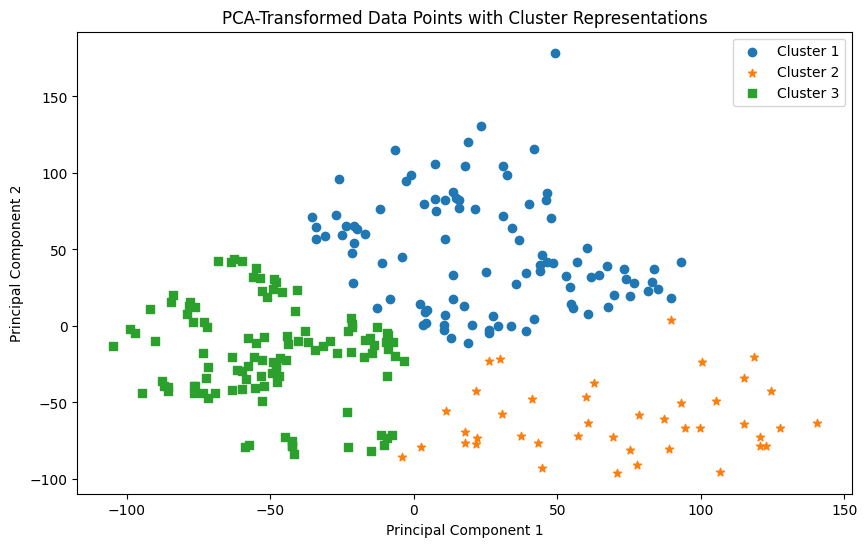

In [29]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.iloc[:, 1:-1])  # Exclude User Id and Cluster columns

# Plot the PCA-transformed data points with cluster representations
plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_points = data_pca[data['Cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}', marker=marker_styles[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-Transformed Data Points with Cluster Representations')
plt.legend()
plt.show()


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


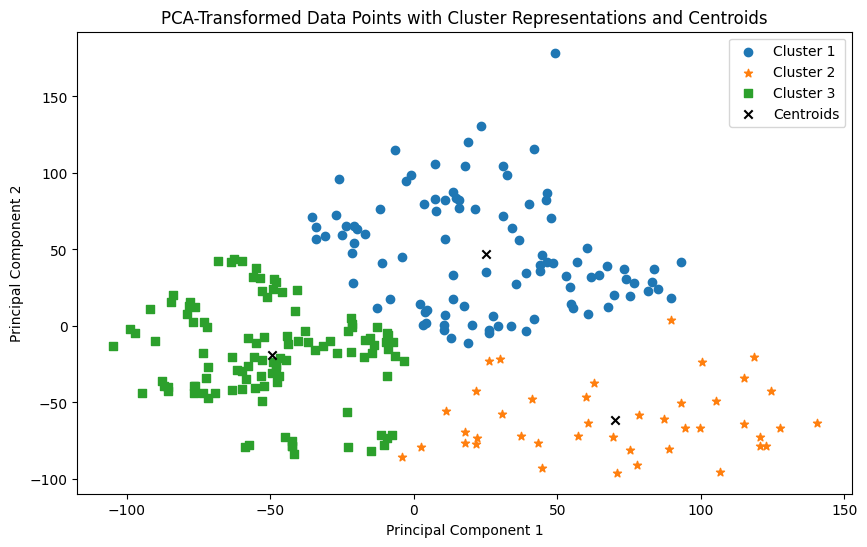

In [30]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.iloc[:, 1:-1])  # Exclude User Id and Cluster columns

# Plot the PCA-transformed data points with cluster representations
plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_points = data_pca[data['Cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}', marker=marker_styles[i])

# Plot the centroids
centroids_pca = pca.transform(centroids)  # Transform centroids to PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='black', marker='x', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-Transformed Data Points with Cluster Representations and Centroids')
plt.legend()
plt.show()


cluster pridiction

In [31]:
# Assuming you have the user's data in a DataFrame called user_data
# user_data should have the same format as your training data, excluding the 'User Id' column

# Predict the c,,luster for the user's data
user_data = [[10,80,45,47,80,75],[20,133,149,139,144,213]]
user_cluster = kmeans.predict(user_data)

print("Predicted cluster for the user:", user_cluster)


Predicted cluster for the user: [2 0]


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


2nd clustering model

Hirarchial clutering 

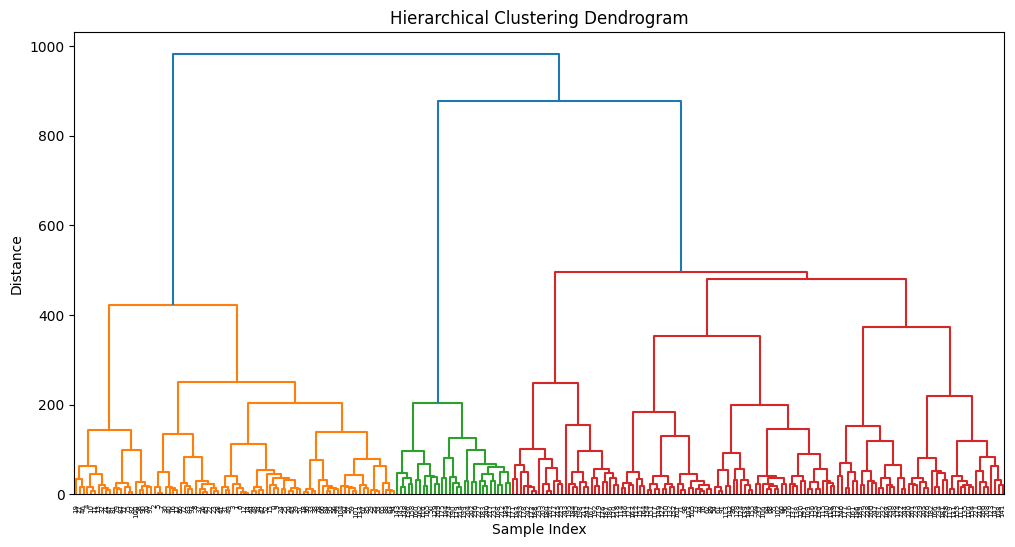

In [32]:
data2 = pd.read_csv('data.csv')

# Drop the 'User Id' column if it exists
if 'User Id' in data2.columns:
    data2.drop('User Id', axis=1, inplace=True)

# Perform hierarchical clustering
Z = linkage(data2, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

So according to hierarchical clustering k = 3 will be perfect for clustering so we can say at k=3 we can make 3 cluster and all these data point or user can be clustered in 3 main group 

K-mean clustering with k=3

In [33]:


# Specify the number of clusters (K)
k = 3  # You can choose an appropriate value based on domain knowledge or using techniques like elbow method or silhouette score

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(data.iloc[:, 1:])  # Exclude the User Id column

# Get cluster labels for each data point
cluster_labels = kmeans.labels_
# print(cluster_labels)


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


summery at k = 3

In [34]:
# Add cluster labels to the dataset
data['Cluster'] = cluster_labels
# print(data)

# Analyze the characteristics of each cluster
cluster_summary = data.iloc[:, 1:].groupby('Cluster').mean()
print(cluster_summary)


            Sports   Religious      Nature     Theatre    Shopping      Picnic
Cluster                                                                       
0        17.418367  113.387755  166.663265  139.908163  114.489796  142.632653
1        15.309524  159.452381   85.309524  108.833333  179.071429  135.880952
2         5.825688   87.394495  101.733945   98.128440   85.376147   94.449541


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


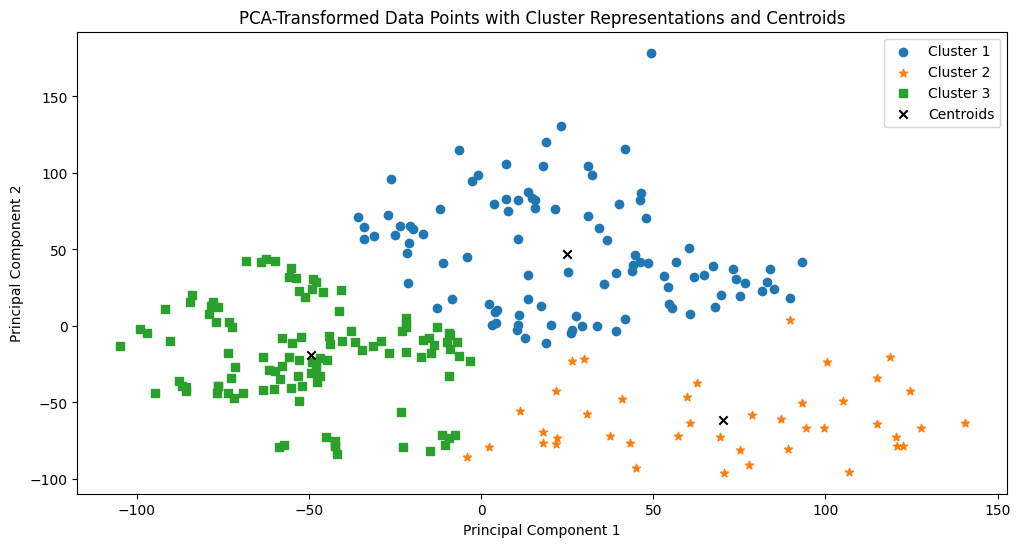

In [35]:


# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.iloc[:, 1:-1])  # Exclude User Id and Cluster columns

# Plot the PCA-transformed data points with cluster representations
plt.figure(figsize=(12, 6))
for i in range(k):
    cluster_points = data_pca[data['Cluster'] == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}', marker=marker_styles[i])

# Plot the centroids
centroids_pca = pca.transform(centroids)  # Transform centroids to PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='black', marker='x', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-Transformed Data Points with Cluster Representations and Centroids')
plt.legend()
plt.show()


#### result explain
* Cluster 0:

This cluster has moderate values for most features.
It has relatively higher values for Sports, Religious, and Nature compared to other clusters.
It has moderate values for Theatre, Shopping, and Picnic.
* Cluster 1:

This cluster has relatively high values for Religious and Shopping compared to other clusters.
It has moderate values for Sports, Nature, and Picnic.
It has relatively low values for Theatre.
* Cluster 2:

This cluster has relatively low values for all features compared to other clusters.
It has the lowest values for Religious, Nature, and Shopping.
It has slightly higher values for Sports and Picnic.